(sec-qcoin)=
# Tossing a quantum coin

To demonstrate the stochastic nature of quantum measurement, we consider a quantum coin.  The coin has two states, head and tail. We assign head to $|0\rangle$ and tail to $|1\rangle$  The superposition state $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ indicates that the state of the quantum coin is neither head nor tail.  Based on the Born rule, the chance to get head is 50% and tail 50%.  Since the outcome is completely random, measuring the state of the quantum coin is equivalent to tossing a classical coin.

In the following qiskit code, the superposition state using a Hadamard gate (we will discuss this in next chapter) and then the state of the qubit is measured.  The result is stored in a classical bit. The quantum computation is simulated with `qasm_simulator` on your computer instead of sending the code to a real quantum computer. (We will send this to real quantum computer in a later chapter.) We repeat the simulation 10000 times and find the probabilities to find head and tail. Since the number of samplings is finite, the result is not exactly 50%-50% but close to  it.

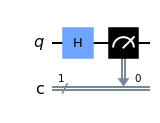

In [1]:
# Tossing Up Quantum Coin

# import numpy
import numpy as np

# import entire qiskit
from qiskit import *

# set classical register (bit)
cr = ClassicalRegister(1,'c')

# set quantum register (qubit)
qr = QuantumRegister(1,'q')

# reset the quantum circuit
qc = QuantumCircuit(qr,cr)

# construct quantum circuit
# step 1: create the superposition state with Hardamard gate
qc.h(0)

# measurement on qubit 
# output is stored in cllasical register
qc.measure(qr,cr)

# show the quantum circuit
qc.draw('mpl')

The quantum circuit shows two lines, one for quantum register and the other for classical register.  The classical register contains a bit.  Usually the outcome of measurement on a qubit is stored. The quantum register contains a qubit.  It is initially reset to $\ket{0}$.  The diagram shows that a single-qubit gate `H` (Hadamard gate) is applied on the qubit.  The outcome is $H |0\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$.  The next gate shows that the state of the qubit is measured and the result, either **0** or **1**, is sent to the classical register.  In the current example, **0** or **1** is obtained with the equal probability.  Now, we execute the circuit.

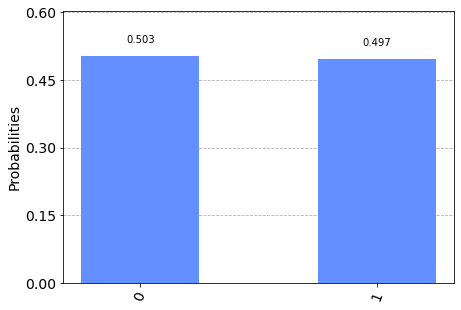

In [2]:
# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit 10000 times
job = backend.run(qc,shots=10000)

# get the result
result = job.result()

# Count the outcome
# Numbers of |0> and |1>
counts = result.get_counts()

# Visualize the outcome
# import histgram plotting function
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# The result should be close to 0.5 for both |0> and |1>.